In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(4682)

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Kfold cv
from sklearn.model_selection import KFold

# Random forest
from sklearn.ensemble import RandomForestClassifier

# Importing xgboost and shap
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import fbeta_score

/home/ramon/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


# SONAR

# Importing data

In [2]:
df = pd.read_csv("data/sonar/sonar.all-data", sep='\t', header=None)
df.rename(columns={60:"outcome"},inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,outcome
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [3]:
df["outcome"] = df["outcome"].map({1:1.0, -1:0.0})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,outcome
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1.0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1.0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1.0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1.0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1.0


In [4]:
df.shape

(208, 61)

In [5]:
df = df.dropna()
df.shape

(208, 61)

# Splitting data

In [24]:
# split data into train and test sets
seed = 7
test_size = 0.33
X = StandardScaler().fit_transform(df.drop('outcome', axis=1))
y = df['outcome'].values
#X_train, X_test, y_train, y_test = train_test_split(X, df.outcome, test_size=test_size, random_state=seed)

In [25]:
results = []

cv = KFold(n_splits=2, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    
    model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    
    # explain the model's predictions using SHAP
    # (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
    explainer = shap.TreeExplainer(model)

    shap_values = explainer.shap_values(X)

    features = df.columns[df.columns!='outcome']
    #df[features]

    # visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
    #shap.force_plot(explainer.expected_value[0], shap_values[0][0], df[features].iloc[0,:], feature_names=features)

    #shap.force_plot(explainer.expected_value[0], shap_values[0], df[features])

    #shap.summary_plot(shap_values[0], df[features])

    # shap.summary_plot(shap_values, df[features], plot_type="bar")

    mean_shap_values = np.mean(np.abs(shap_values[0]), axis=0)
    shap_df = pd.DataFrame(mean_shap_values, index=df[features].columns, columns=["SHAP"])
    shap_df.sort_values(by="SHAP", inplace=True, ascending=False)
    # shap_df.plot(kind="bar")
    
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)

    indices = np.argsort(importances)[::-1]

    fi_df = pd.DataFrame(dict(zip(features[indices], importances[indices])), index=['Importance'])
    fi_df = fi_df.T
    # fi_df.head()
    # fi_df.plot(kind="bar")
    
    test = SelectKBest(score_func=f_classif, k=X_train.shape[1])
    fit = test.fit(X_train, y_train)
    # summarize scores
    set_printoptions(precision=3)
    # print(fit.scores_)

    kbest_dict = dict(zip(df.drop('outcome', axis=1).columns, fit.scores_))
    kbest_df = pd.DataFrame(kbest_dict, index=['KBest']).transpose()
    kbest_df.sort_values(by='KBest', ascending=False, inplace=True)
    # kbest_df.plot(kind="bar")
    
    # Transforming X from numpy to pandas to recover features
    X_train_df = pd.DataFrame(X_train, columns=df.drop(["outcome"], axis=1).columns)
    X_test_df = pd.DataFrame(X_test, columns=df.drop(["outcome"], axis=1).columns)

    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    lda.fit(X_train_df.values, y_train)
    y_pred = lda.predict(X_test_df)
    # use Kernel SHAP to explain test set predictions
    explainer = shap.KernelExplainer(lda.predict_proba, X_train_df, link="logit")
    shap_values = explainer.shap_values(X_test, nsamples=100)
    
    # plot the SHAP values for the Setosa output of the first instance
    # shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_df.iloc[0,:], link="logit")

    lda_shap_df = pd.DataFrame(np.mean(np.abs(shap_values[0]), axis=0), index=X_train_df.columns, columns=["LDA_SHAP"])
    lda_shap_df.sort_values(by="LDA_SHAP", ascending=False, inplace=True)
    # lda_shap_df.head()
    # lda_shap_df.plot(kind="bar")
    
    fs_df = pd.DataFrame(list(zip(shap_df.index, fi_df.index, kbest_df.index, lda_shap_df.index)), columns=["SHAP", "Importance", "KBest", "LDA_SHAP"])
    fs_df.head()
    # Initializing dataframe for results
    LDA_scores = pd.DataFrame(index=range(fs_df.shape[0]), columns=fs_df.columns)
    # Filling in LDA scores
    for num_features in range(fs_df.shape[0]):
        fs_df.iloc[:num_features+1]
        for method in fs_df.columns:
            selected_features = fs_df.iloc[:num_features+1][method]
            lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
            y_pred = lda.fit(X_train_df[selected_features].values, y_train).predict(X_test_df[selected_features])
            LDA_scores.loc[num_features, method] = fbeta_score(y_test, y_pred, beta=1)
    
    results.append(LDA_scores)
    LDA_scores.plot()

Using 104 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Train Index:  [  0   1   3   4   6   7   8  10  13  14  17  20  21  23  27  32  34  37
  39  40  43  44  47  48  49  50  52  53  54  57  58  59  62  63  64  70
  71  72  74  80  81  83  87  88  89  91  92  94  99 102 103 105 106 107
 110 112 114 116 119 121 122 123 129 130 131 133 134 136 143 144 149 150
 151 152 153 156 157 159 160 162 163 169 172 173 174 175 179 182 183 184
 186 187 188 189 191 192 193 196 199 200 201 204 206 207] 

Test Index:  [  2   5   9  11  12  15  16  18  19  22  24  25  26  28  29  30  31  33
  35  36  38  41  42  45  46  51  55  56  60  61  65  66  67  68  69  73
  75  76  77  78  79  82  84  85  86  90  93  95  96  97  98 100 101 104
 108 109 111 113 115 117 118 120 124 125 126 127 128 132 135 137 138 139
 140 141 142 145 146 147 148 154 155 158 161 164 165 166 167 168 170 171
 176 177 178 180 181 185 190 194 195 197 198 202 203 205]
Accuracy: 75.00%


  0%|          | 0/104 [00:00<?, ?it/s]

divide by zero encountered in double_scalars


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [70]:
columns = results[0].columns
CV_LDA_scores = pd.DataFrame(columns=["FScore", "NFeatures", "Method", "Fold"])

for fold, lda_result in enumerate(results):
    for col in columns:
        test_df = pd.DataFrame({"FScore" : lda_result[col],
                                "NFeatures": np.arange(len(lda_result))+1,
                                "Method": [col]*len(lda_result),
                                "Fold": [fold]*len(lda_result)})
        CV_LDA_scores = pd.concat([CV_LDA_scores, test_df])
        
# Asserting data types
CV_LDA_scores.FScore = CV_LDA_scores.FScore.astype(float)
CV_LDA_scores.NFeatures = CV_LDA_scores.NFeatures.astype(int)
# Plot
sns.lineplot(data=CV_LDA_scores, x="NFeatures", y="FScore", hue="Method")

In [76]:
a4_dims = (11.7, 8.27)
df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)

CV_LDA_scores.FScore = CV_LDA_scores.FScore.astype(float)
CV_LDA_scores.NFeatures = CV_LDA
_scores.NFeatures.astype(int)

<AxesSubplot:xlabel='NFeatures', ylabel='FScore'>

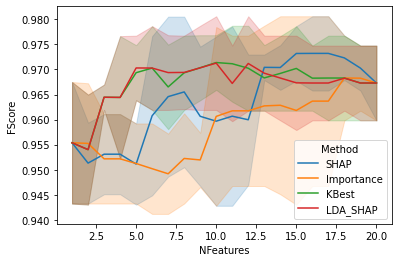

In [24]:
columns = results[0].columns
CV_LDA_scores = pd.DataFrame(index=range(fs_df.shape[0]), columns=columns)
for col in columns:
    CV_LDA_scores[col] = np.mean([lda_result[col] for lda_result in results], axis=0)
    CV_LDA_scores[col] = np.mean([lda_result[col] for lda_result in results], axis=0)

In [29]:
import seaborn as sns

<AxesSubplot:>

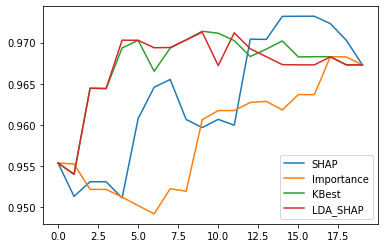

In [28]:
CV_LDA_scores.plot()

# Training Random Forest Model

In [4]:

model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.18%


# SHAP

<AxesSubplot:>

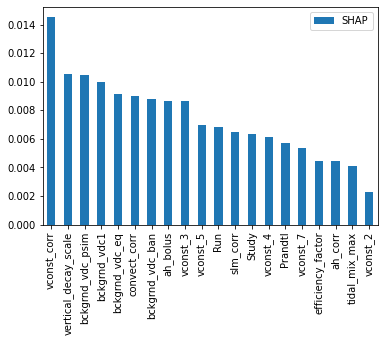

In [6]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X)

features = df.columns[df.columns!='outcome']
#df[features]

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#shap.force_plot(explainer.expected_value[0], shap_values[0][0], df[features].iloc[0,:], feature_names=features)

#shap.force_plot(explainer.expected_value[0], shap_values[0], df[features])

#shap.summary_plot(shap_values[0], df[features])

# shap.summary_plot(shap_values, df[features], plot_type="bar")

mean_shap_values = np.mean(np.abs(shap_values[0]), axis=0)
shap_df = pd.DataFrame(mean_shap_values, index=df[features].columns, columns=["SHAP"])
shap_df.sort_values(by="SHAP", inplace=True, ascending=False)
shap_df.plot(kind="bar")

# Random Forest Feature Importance

<AxesSubplot:>

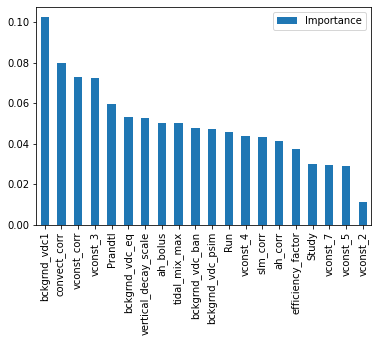

In [8]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

fi_df = pd.DataFrame(dict(zip(features[indices], importances[indices])), index=['Importance'])
fi_df = fi_df.T
#fi_df.head()

fi_df.plot(kind="bar")

# Seleção por K-Best features

<AxesSubplot:>

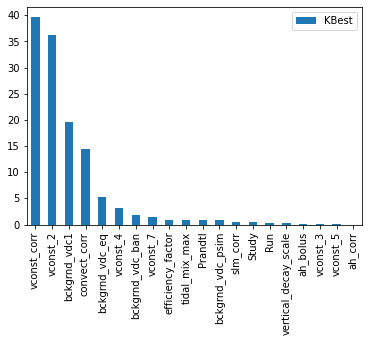

In [10]:
test = SelectKBest(score_func=f_classif, k=X_train.shape[1])
fit = test.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=3)
#print(fit.scores_)

kbest_dict = dict(zip(df.drop('outcome', axis=1).columns, fit.scores_))
kbest_df = pd.DataFrame(kbest_dict, index=['KBest']).transpose()
kbest_df.sort_values(by='KBest', ascending=False, inplace=True)
kbest_df.plot(kind="bar")

# Calculating SHAP for LDA

In [14]:
# Transforming X from numpy to pandas to recover features
X_train_df = pd.DataFrame(X_train, columns=df.drop(["outcome"], axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(["outcome"], axis=1).columns)

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_train_df.values, y_train)
y_pred = lda.predict(X_test_df)

In [15]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(lda.predict_proba, X_train_df, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

Using 361 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/179 [00:00<?, ?it/s]

<AxesSubplot:>

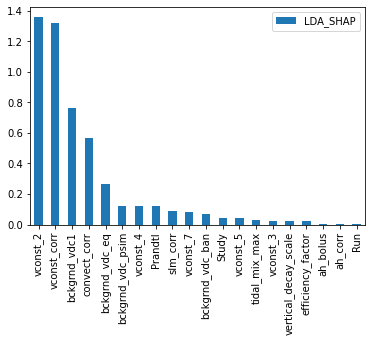

In [16]:
# plot the SHAP values for the Setosa output of the first instance
# shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_df.iloc[0,:], link="logit")

lda_shap_df = pd.DataFrame(np.mean(np.abs(shap_values[0]), axis=0), index=X_train_df.columns, columns=["LDA_SHAP"])
lda_shap_df.sort_values(by="LDA_SHAP", ascending=False, inplace=True)
# lda_shap_df.head()
lda_shap_df.plot(kind="bar")

# Combining Feature Orders

In [17]:
fs_df = pd.DataFrame(list(zip(shap_df.index, fi_df.index, kbest_df.index, lda_shap_df.index)), columns=["SHAP", "Importance", "KBest", "LDA_SHAP"])
fs_df.head()

,SHAP,Importance,KBest,LDA_SHAP
0,vconst_corr,bckgrnd_vdc1,vconst_corr,vconst_2
1,vertical_decay_scale,convect_corr,vconst_2,vconst_corr
2,bckgrnd_vdc_psim,vconst_corr,bckgrnd_vdc1,bckgrnd_vdc1
3,bckgrnd_vdc1,vconst_3,convect_corr,convect_corr
4,bckgrnd_vdc_eq,Prandtl,bckgrnd_vdc_eq,bckgrnd_vdc_eq


<AxesSubplot:>

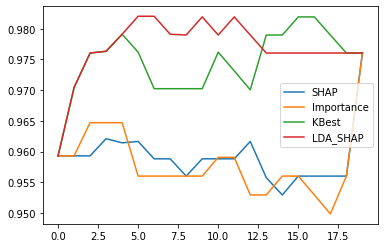

In [18]:
# Initializing dataframe for results
LDA_scores = pd.DataFrame(index=range(fs_df.shape[0]), columns=fs_df.columns)
# Filling in LDA scores
for num_features in range(fs_df.shape[0]):
    fs_df.iloc[:num_features+1]
    for method in fs_df.columns:
        selected_features = fs_df.iloc[:num_features+1][method]
        lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
        y_pred = lda.fit(X_train_df[selected_features].values, y_train).predict(X_test_df[selected_features])
        LDA_scores.loc[num_features, method] = fbeta_score(y_test, y_pred, beta=1)
LDA_scores.plot()

___

- Testar para mais bases de dados
    - sonar
    - ILPD (poucas features)
    - ionosfera
    - mfit (fácil)
- Cross validation
- Influência do modelo nos Shapley Values
    - Mesmo modelo, diferentes performances
    - Modelos diferentes

___

Métodos de feature importance (single variable):
- Feature score
- Correlação
- AUC por variavel

Resultado do model com as top X variaveis

LDA para cada variável-> salvar resultados 